# Read Atlantic or Epac storm data from IBTRacS and plot histograms for TC categories


## NCSU Tropical and Large Scale Dynamics

Anantha Aiyyer


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr


dataDir  = "./"
filename = "IBTrACS.since1980.v04r00.nc"


# select basin
# for this code choose only NA or EP
basinWant = str.encode("NA")

# select year range
year1 = 1980
year2 = 2020

file = dataDir+filename

try:
    ds = xr.open_dataset(file)
except:
    print ("file not found. quitting code")
    quit()
    
print ("Ibtracs file found and opened")



Ibtracs file found and opened


In [2]:
# subset the storms based on the basin and years
years = pd.to_datetime(ds.time[:,0].values).year
inds = np.where( (ds.basin[:,0] == basinWant) & (years>year1) & (years<year2))[0]


In [3]:
#The variable usa_sshs contains the storm category for the USA defined EP and NA basins 
sshs  = ds.usa_sshs[inds,:]
max_sshs = sshs.max(dim='date_time',skipna=True)


# Use pandas and seaborn for histogram

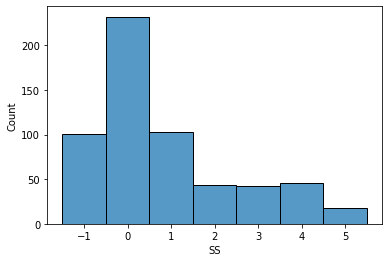

In [4]:
# Now create a pandas dataframe for easy histogram plot
# omit categories less than -2 
df = pd.DataFrame({'SS':  max_sshs.where(max_sshs > -2, drop=True)})

#print (df.SS.value_counts(dropna=False))
#print(df.groupby(['SS'])['SS'].count())



# use seaborn for the plot
sns.histplot(data=df, x="SS", discrete=True)
plt.show()


# Some additional info - for example, names of cat5 storms

In [5]:
StormNames  = ds.name[inds]
StormDates  = ds.time[inds,0]


# list the names and years of category 5 storms
cat5N = StormNames.where(max_sshs == 5, drop=True).values
cat5Y = pd.to_datetime(StormDates.where(max_sshs == 5, drop=True).values).year
for y,n in zip(cat5Y,cat5N):
    print(y,n.decode())


1988 GILBERT
1989 HUGO
1992 ANDREW
1998 MITCH
2003 ISABEL
2004 IVAN
2005 EMILY
2005 KATRINA
2005 RITA
2005 WILMA
2007 DEAN
2007 FELIX
2016 MATTHEW
2017 IRMA
2017 MARIA
2018 MICHAEL
2019 DORIAN
2019 LORENZO
